[Paper-3](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8274904/)

#part A  - concatenation 

In [1]:
from google.colab import drive
drive.mount('/content/drive')  

Mounted at /content/drive


In [2]:
from __future__ import print_function  
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import torch.utils.data as data 
from torch.utils.data import Subset, DataLoader, random_split
from torchvision.datasets import ImageFolder
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose, ToTensor, Resize
from torch.optim.lr_scheduler import ExponentialLR, StepLR, ReduceLROnPlateau
from sklearn import metrics
from torch.nn import functional as F
import cv2
import tensorflow as tf
import keras
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder


import matplotlib.pyplot as plt
import time
import os
import copy
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)





# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

PyTorch Version:  1.10.0+cu111
Torchvision Version:  0.11.1+cu111


In [3]:
import os

import tensorflow as tf
import keras
import argparse
#from myconfig import configt
from keras import optimizers
from keras.utils import np_utils
#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
#keras.backend.tensorflow_backend.set_session(tf.Session(config=config))

#conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(230, 230, 3))
#from keras.applications.xception import Xception
#conv_base = Xception(weights='imagenet', include_top=False, input_shape=(96, 96, 3))


from keras import models
from keras import layers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import numpy as np
from imutils import paths
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import Average
from keras.layers import merge

from keras import applications
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.models import Model, Input

import argparse

from keras import optimizers
import seaborn as sns
#from keras.engine.topology import Input


In [4]:
import json
import math
import os

import cv2
from PIL import Image
import numpy as np
from keras import layers
from tensorflow.keras.applications import ResNet50,MobileNet, DenseNet201, InceptionV3, NASNetLarge, InceptionResNetV2, NASNetMobile
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools


%matplotlib inline

In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale = 1./255)
       # rotation_range=40,
       # height_shift_range=0.2,
       # shear_range=0.2,
       # zoom_range=0.2,
       # horizontal_flip=True,
       # fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    directory="/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_train/",
    target_size=(230, 230),
    color_mode="rgb",
    batch_size=4,
    class_mode="categorical",
    shuffle=False,
    seed=42
)
valid_generator = valid_datagen.flow_from_directory(
    directory="/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_val/",
    target_size=(230, 230),
    color_mode="rgb",
    batch_size=4,
    class_mode="categorical",
    shuffle=False,
    seed=42
)

Found 480 images belonging to 8 classes.
Found 40 images belonging to 8 classes.


In [7]:
print("label map for train: ",train_generator.class_indices)
print("")
print("----")
print("")
print("label map for val data: ",valid_generator.class_indices)

label map for train:  {'benign_adenosis': 0, 'benign_fibroadenoma': 1, 'benign_phyllodestumor': 2, 'benign_tubularadenoma': 3, 'malignant_ductalcarcinoma': 4, 'malignant_lobularcarcinoma': 5, 'malignant_mucinouscarcinoma': 6, 'malignant_papillarycarcinoma': 7}

----

label map for val data:  {'benign_adenosis': 0, 'benign_fibroadenoma': 1, 'benign_phyllodestumor': 2, 'benign_tubularadenoma': 3, 'malignant_ductalcarcinoma': 4, 'malignant_lobularcarcinoma': 5, 'malignant_mucinouscarcinoma': 6, 'malignant_papillarycarcinoma': 7}


In [8]:
print("Train classes: ",train_generator.classes)
print("")
print("Valid classes: ",valid_generator.classes)

Train classes:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]

Valid cla

In [9]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
testGen = test_datagen.flow_from_directory(
    directory="/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_test/",
    target_size=(230, 230),
    color_mode="rgb",
    batch_size=1,
    class_mode="categorical",  #None
    shuffle=False,
    #seed=42
)
nBatches = 1

Found 1876 images belonging to 8 classes.


In [11]:

# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-p", "--plot", type=str, default="plot.png",
#	help="path to output loss/accuracy plot")
#args = vars(ap.parse_args())

# initialize our number of epochs, initial learning rate, and batch
# size


chanDim=-1

def resnet500(model_input):
    base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=model_input)
    last = base_model.output
    x = layers.Flatten()(last)
    x = Dense(256, activation='relu')(x)
    #preds = Dense(8, activation='softmax')(x)
    #model = Model(base_model.input, preds)
    model = Model(base_model.input, x)

    base_model.trainable = True
    set_trainable = False
    for layer in base_model.layers:
        if layer.name == 'add_30': # 从这一层开始往后均可训练
            set_trainable = True
            if set_trainable:
                layer.trainable = True
            else:
                layer.trainable = False
    
    return model

def vgg166(model_input):
    base_model = VGG16(weights='imagenet', include_top=False, input_tensor=model_input)
    last = base_model.output
    x = layers.Flatten()(last)
    x = Dense(256, activation='relu')(x)
    #preds = Dense(8, activation='softmax')(x)
    model = Model(base_model.input, x)

    base_model.trainable = True
    set_trainable = False
    for layer in base_model.layers:
        if layer.name == 'block5_conv1': # 从这一层开始往后均可训练
            set_trainable = True
            if set_trainable:
                layer.trainable = True
            else:
                layer.trainable = False
    
    return model

model_input = Input(shape=(230, 230, 3))


model1 = resnet500(model_input)
model2 = vgg166(model_input)

ensembled_models = [model1,model2]
def ensemble(models,model_input):
    outputs = [model.outputs[0] for model in models]
    #modelo1 = model1.outputs[0]
    #modelo2 = model2.outputs[0]
    modelo1 = outputs[0]
    modelo2 = outputs[1]
    y = layers.concatenate([modelo1, modelo2], axis=-1)
    preds = Dense(8, activation='softmax')(y)
    model = Model(model_input,preds,name='ensemble')
    return model


ensemble_model = ensemble(ensembled_models,model_input)

58900480/58889256 [==============================] - 0s 0us/step


In [25]:
#from keras.utils import plot_model
#plot_model(ensemble_model, show_shapes=True, to_file='bcdnet_comodel.png')
#added = keras.layers.add([input1, input2])


# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-p", "--plot", type=str, default="plot.png",
#	help="/content/drive/My Drive/BreaKHis2_8_trial/")
#args = vars(ap.parse_args())


In [13]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import MultiLabelBinarizer


def generate_class_weights(class_series, multi_class=True, one_hot_encoded=False):
  """
  Method to generate class weights given a set of multi-class or multi-label labels, both one-hot-encoded or not.
  Some examples of different formats of class_series and their outputs are:
    - generate_class_weights(['mango', 'lemon', 'banana', 'mango'], multi_class=True, one_hot_encoded=False)
    {'banana': 1.3333333333333333, 'lemon': 1.3333333333333333, 'mango': 0.6666666666666666}
    - generate_class_weights([[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0]], multi_class=True, one_hot_encoded=True)
    {0: 0.6666666666666666, 1: 1.3333333333333333, 2: 1.3333333333333333}
    - generate_class_weights([['mango', 'lemon'], ['mango'], ['lemon', 'banana'], ['lemon']], multi_class=False, one_hot_encoded=False)
    {'banana': 1.3333333333333333, 'lemon': 0.4444444444444444, 'mango': 0.6666666666666666}
    - generate_class_weights([[0, 1, 1], [0, 0, 1], [1, 1, 0], [0, 1, 0]], multi_class=False, one_hot_encoded=True)
    {0: 1.3333333333333333, 1: 0.4444444444444444, 2: 0.6666666666666666}
  The output is a dictionary in the format { class_label: class_weight }. In case the input is one hot encoded, the class_label would be index
  of appareance of the label when the dataset was processed. 
  In multi_class this is np.unique(class_series) and in multi-label np.unique(np.concatenate(class_series)).
  Author: Angel Igareta (angel@igareta.com)
  """
  if multi_class:
    # If class is one hot encoded, transform to categorical labels to use compute_class_weight   
    if one_hot_encoded:
      class_series = np.argmax(class_series, axis=1)
  
    # Compute class weights with sklearn method
    class_labels = np.unique(class_series)
    class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=class_series)
    return dict(zip(class_labels, class_weights))
  else:
    # It is neccessary that the multi-label values are one-hot encoded
    mlb = None
    if not one_hot_encoded:
      mlb = MultiLabelBinarizer()
      class_series = mlb.fit_transform(class_series)

    n_samples = len(class_series)
    n_classes = len(class_series[0])

    # Count each class frequency
    class_count = [0] * n_classes
    for classes in class_series:
        for index in range(n_classes):
            if classes[index] != 0:
                class_count[index] += 1
    
    # Compute class weights using balanced method
    class_weights = [n_samples / (n_classes * freq) if freq > 0 else 1 for freq in class_count]
    class_labels = range(len(class_weights)) if mlb is None else mlb.classes_
    return dict(zip(class_labels, class_weights))

In [17]:
class_weight = generate_class_weights(testGen.classes)
print(class_weight)

{0: 2.392857142857143, 1: 0.9852941176470589, 2: 2.49468085106383, 3: 1.7765151515151516, 4: 0.2736289381563594, 5: 1.675, 6: 1.247340425531915, 7: 1.817829457364341}


In [18]:

# initialize our number of epochs, initial learning rate, and batch
# size
NUM_EPOCHS = 38
INIT_LR = 1e-2
BS = 16

'''
# initialize the training generator
trainGen = trainAug.flow_from_directory(
	"/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_train/",
	class_mode="categorical",
	target_size=(230, 230),
	color_mode="rgb",
	shuffle=True,
	batch_size=BS)

# initialize the validation generator
valGen = valAug.flow_from_directory(
	"/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_val/",
	class_mode="categorical",
	target_size=(230, 230),
	color_mode="rgb",
	shuffle=False,
	batch_size=BS )

# initialize the testing generator
testGen = valAug.flow_from_directory(
	"/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_test/",
	class_mode="categorical",
	target_size=(230, 230),
	color_mode="rgb",
	shuffle=False,
	batch_size=BS)
  '''

# initialize our CancerNet model and compile it

#opt = Adagrad(lr=INIT_LR, decay=INIT_LR / NUM_EPOCHS)
#opt= Ranger(params=CancerNet.parameters(), lr=1e-3, alpha=0.5, k=6, N_sma_threshhold=5, betas=(.95,0.999), eps=1e-5, weight_decay=0)
#opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#opt = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=0.5, decay=INIT_LR / NUM_EPOCHS)
#opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0)
#opt = optimizers.Adadelta(lr=0.01, rho=0.95, epsilon=0.05, decay=1e-2)
#opt = optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
opt = tf.keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)
ensemble_model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])



# 绘制训练过程中的损失曲线和精度曲线




H = ensemble_model.fit_generator(
	train_generator,
	steps_per_epoch=80 // BS,
	validation_data=valid_generator,
	validation_steps=40 // BS,
	class_weight=class_weight, #{0: 9, 1: 4, 2: 9,3:6, 4: 1, 5: 6,6: 4.5, 7: 7}
	epochs=NUM_EPOCHS)

# reset the testing generator and then use our trained model to
# make predictions on the data


Epoch 1/38
5/5 [==============================] - 101s 14s/step - loss: 28.4164 - accuracy: 0.1000 - val_loss: 6820986.0000 - val_accuracy: 0.6250
Epoch 2/38
5/5 [==============================] - 67s 13s/step - loss: 12.7168 - accuracy: 0.2000 - val_loss: 31902878.0000 - val_accuracy: 0.0000e+00
Epoch 3/38
5/5 [==============================] - 66s 13s/step - loss: 12.6269 - accuracy: 0.0000e+00 - val_loss: 87218118656.0000 - val_accuracy: 0.0000e+00
Epoch 4/38
5/5 [==============================] - 68s 14s/step - loss: 160.2223 - accuracy: 0.3500 - val_loss: 104611061760.0000 - val_accuracy: 0.0000e+00
Epoch 5/38
5/5 [==============================] - 68s 14s/step - loss: 344.7641 - accuracy: 0.3000 - val_loss: 101138808832.0000 - val_accuracy: 0.6250
Epoch 6/38
5/5 [==============================] - 65s 13s/step - loss: 9.3205 - accuracy: 0.1000 - val_loss: 4358576128.0000 - val_accuracy: 0.0000e+00
Epoch 7/38
5/5 [==============================] - 65s 13s/step - loss: 15.2390 - acc

In [19]:


# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
# label with corresponding largest predicted probability
ensemble_model.save("/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_test/zuhe.h5")


In [20]:
print("[INFO] evaluating network...")
testGen.reset()
predIdxs = ensemble_model.predict_generator(testGen)
predIdxs = np.argmax(predIdxs, axis=1)
print(confusion_matrix(testGen.classes, predIdxs))
# show a nicely formatted classification report
print(classification_report(testGen.classes, predIdxs,
	target_names=testGen.class_indices.keys(), digits=4))


[INFO] evaluating network...
[[  0   0  98   0   0   0   0   0]
 [  0   0 238   0   0   0   0   0]
 [  0   0  94   0   0   0   0   0]
 [  0   0 132   0   0   0   0   0]
 [  0   0 857   0   0   0   0   0]
 [  0   0 140   0   0   0   0   0]
 [  0   0 188   0   0   0   0   0]
 [  0   0 129   0   0   0   0   0]]
                              precision    recall  f1-score   support

             benign_adenosis     0.0000    0.0000    0.0000        98
         benign_fibroadenoma     0.0000    0.0000    0.0000       238
       benign_phyllodestumor     0.0501    1.0000    0.0954        94
       benign_tubularadenoma     0.0000    0.0000    0.0000       132
   malignant_ductalcarcinoma     0.0000    0.0000    0.0000       857
  malignant_lobularcarcinoma     0.0000    0.0000    0.0000       140
 malignant_mucinouscarcinoma     0.0000    0.0000    0.0000       188
malignant_papillarycarcinoma     0.0000    0.0000    0.0000       129

                    accuracy                         0.050

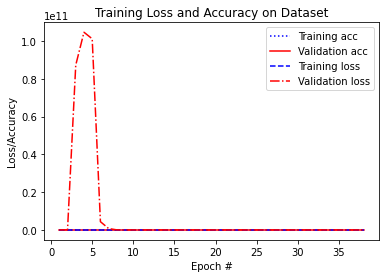

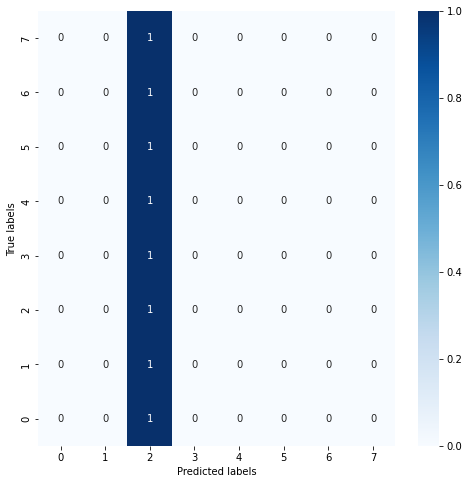

In [21]:

# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity


import matplotlib.pyplot as plt

acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b:', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.plot(epochs, loss, 'b--', label='Training loss')
plt.plot(epochs, val_loss, 'r-.', label='Validation loss')
plt.title('Training Loss and Accuracy on Dataset')
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()




# === 混淆矩阵：真实值与预测值的对比 ===
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
con_mat = confusion_matrix(testGen.classes, predIdxs)

con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]     # 归一化

con_mat_norm = np.around(con_mat_norm, decimals=4)

# === plot ===
plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_norm, annot=True, cmap='Blues')

plt.ylim(0, 8)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')


plt.show()

In [22]:
preds = ensemble_model.predict_generator(testGen)

In [26]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
#roc auc score
scr1 = roc_auc_score(testGen.classes, preds, multi_class='ovo', average='macro')
scr3 = roc_auc_score(testGen.classes, preds, multi_class='ovr', average='macro')
scr2 = roc_auc_score(testGen.classes, preds, multi_class='ovo', average='weighted')
scr4 = roc_auc_score(testGen.classes, preds, multi_class='ovr', average='weighted')


print("macro - ovo ROC AUC Score: ", scr1)
print("")

print("weighted - ovo ROC AUC Score: ", scr2)
print("")

print("macro - ovr ROC AUC Score: ", scr3)
print("")

print("weighted - ovr ROC AUC Score: ", scr4)
print("")

macro - ovo ROC AUC Score:  0.5

weighted - ovo ROC AUC Score:  0.5

macro - ovr ROC AUC Score:  0.5

weighted - ovr ROC AUC Score:  0.5



class 0 - A  : --AUC---> 0.5
class 1 - F  : --AUC---> 0.5
class 2 - PT  : --AUC---> 0.5
class 3 - TA  : --AUC---> 0.5
class 4 - DC  : --AUC---> 0.5
class 5 - LC  : --AUC---> 0.5
class 6 - MC  : --AUC---> 0.5
class 7 - PC  : --AUC---> 0.5


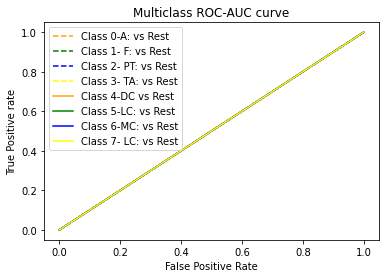

In [25]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

target_names = ['A', 'F', 'PT', 'TA', 'DC','LC', 'MC', 'PC']
n_class = 8

for i in range(len(target_names)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(testGen.classes, predIdxs[:], pos_label=i)
    auroc = round(metrics.auc(fpr[i], tpr[i]),2)
    print('class',i,'-', target_names[i],' :','--AUC--->',auroc)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0-A: vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1- F: vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2- PT: vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3- TA: vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='-',color='orange', label='Class 4-DC vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='-',color='green', label='Class 5-LC: vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='-',color='blue', label='Class 6-MC: vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='-',color='yellow', label='Class 7- LC: vs Rest')


plt.title('Multiclass ROC-AUC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multilass ROC',dpi=300, bbox_inches='tight',   pad_inches = 0);


plt.show()

In [27]:
import sklearn
acc = sklearn.metrics.accuracy_score(testGen.classes, predIdxs)
print(acc)

0.050106609808102345


In [ ]:
"""
# determine the total number of image paths in training, validation,
# and testing directories
trainPaths = list(paths.list_images("/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_train/"))
totalTrain = len(trainPaths)
totalVal = len(list(paths.list_images("/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_val/")))
1876 = len(list(paths.list_images("/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_test/")))

# account for skew in the labeled data
trainLabels = [int(p.split(os.path.sep)[-2]) for p in trainPaths]
trainLabels = np_utils.to_categorical(trainLabels)
classTotals = trainLabels.sum(axis=0)
classWeight = classTotals.max // classTotals

# initialize the training training data augmentation object
trainAug = ImageDataGenerator(
	rescale=1 / 255.0,
	rotation_range=20,
	zoom_range=0.05,
	width_shift_range=0.1,
	height_shift_range=0.1,
	shear_range=0.05,
	horizontal_flip=True,
	vertical_flip=True,
	fill_mode="nearest")

# initialize the validation (and testing) data augmentation object
valAug = ImageDataGenerator(rescale=1 / 255.0)
"""

#EVALUATION 

<font size = 5><font color="yellow">Confusion matrix & classification report

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_prd)
print('Confusion Matrix\n')
print(cm)

Confusion Matrix

[[ 27  14  15   9  14   1  17   1]
 [ 21  90  29  60   8   9  18   3]
 [ 19  38  21  14   1   1   0   0]
 [  7  21  13  53  14   3  20   1]
 [ 38 142  33 138 133  36 296  41]
 [  3  14  12  16   4  30  60   1]
 [ 21  34   7  14  10  11  74  17]
 [ 29  20   8  22   5   5  25  15]]


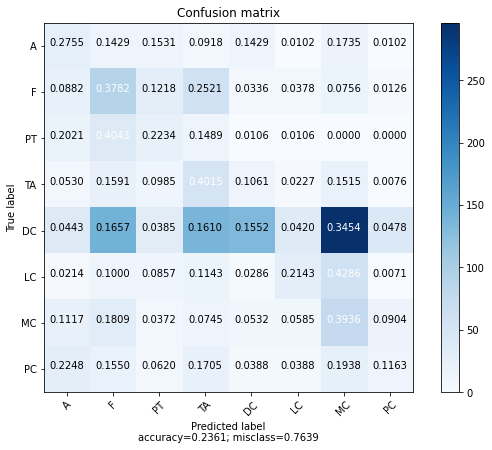

In [ ]:
import numpy as np
import itertools

target_names = ['A', 'F', 'PT', 'TA', 'DC','LC', 'MC', 'PC']

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):



    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

plot_confusion_matrix(cm, target_names,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          normalize=True)

In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_true, y_prd)))

print('Micro Precision: {:.2f}'.format(precision_score(y_true, y_prd, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_true, y_prd, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_true, y_prd, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_true, y_prd, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_true, y_prd, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_true, y_prd, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_true, y_prd, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_true, y_prd, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_true, y_prd, average='weighted')))


from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, y_prd, target_names=['Class 0- A:', 'Class 1- F:', 'Class 2- PT:', 'Class 3- TA:','Class 4- DC:','Class 5- LC:','Class 6- MC:', 'Class 7- PC:'], digits = 4))



Accuracy: 0.24

Micro Precision: 0.24
Micro Recall: 0.24
Micro F1-score: 0.24

Macro Precision: 0.26
Macro Recall: 0.27
Macro F1-score: 0.22

Weighted Precision: 0.43
Weighted Recall: 0.24
Weighted F1-score: 0.24

Classification Report

              precision    recall  f1-score   support

 Class 0- A:     0.1636    0.2755    0.2053        98
 Class 1- F:     0.2413    0.3782    0.2946       238
Class 2- PT:     0.1522    0.2234    0.1810        94
Class 3- TA:     0.1626    0.4015    0.2314       132
Class 4- DC:     0.7037    0.1552    0.2543       857
Class 5- LC:     0.3125    0.2143    0.2542       140
Class 6- MC:     0.1451    0.3936    0.2120       188
Class 7- PC:     0.1899    0.1163    0.1442       129

    accuracy                         0.2361      1876
   macro avg     0.2589    0.2697    0.2222      1876
weighted avg     0.4306    0.2361    0.2398      1876



<font size = 5><font color="yellow">ROC AUC score/curve

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
#roc auc score
scr1 = roc_auc_score(y_true, pred, multi_class='ovo', average='macro')
scr3 = roc_auc_score(y_true, pred, multi_class='ovr', average='macro')
scr2 = roc_auc_score(y_true, pred, multi_class='ovo', average='weighted')
scr4 = roc_auc_score(y_true, pred, multi_class='ovr', average='weighted')

print("macro - ovo ROC AUC Score: ", scr1)
print("")

print("weighted - ovo ROC AUC Score: ", scr2)
print("")

print("macro - ovr ROC AUC Score: ", scr3)
print("")

print("weighted - ovr ROC AUC Score: ", scr4)
print("")


macro - ovo ROC AUC Score:  0.7011088344885369

weighted - ovo ROC AUC Score:  0.6968321609556456

macro - ovr ROC AUC Score:  0.6976514582069377

weighted - ovr ROC AUC Score:  0.6928828255474775



class 0 - A  : --AUC---> 0.37
class 1 - F  : --AUC---> 0.32
class 2 - PT  : --AUC---> 0.22
class 3 - TA  : --AUC---> 0.45
class 4 - DC  : --AUC---> 0.62
class 5 - LC  : --AUC---> 0.63
class 6 - MC  : --AUC---> 0.57
class 7 - PC  : --AUC---> 0.45


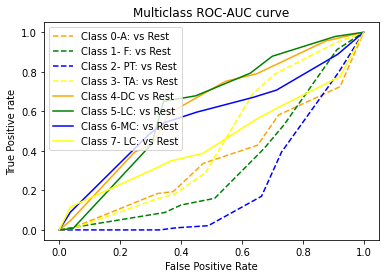

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

target_names = ['A', 'F', 'PT', 'TA', 'DC','LC', 'MC', 'PC']
n_class = 8

for i in range(len(target_names)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_true, y_prd[:], pos_label=i)
    auroc = round(metrics.auc(fpr[i], tpr[i]),2)
    print('class',i,'-', target_names[i],' :','--AUC--->',auroc)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0-A: vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1- F: vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2- PT: vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3- TA: vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='-',color='orange', label='Class 4-DC vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='-',color='green', label='Class 5-LC: vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='-',color='blue', label='Class 6-MC: vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='-',color='yellow', label='Class 7- LC: vs Rest')


plt.title('Multiclass ROC-AUC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multilass ROC',dpi=300, bbox_inches='tight',   pad_inches = 0);


plt.show()